In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "iclr2024experiments"  # set to your entity and project 
all_sweeps = [
    "vae_sweep_0_50k", "vae_sweep_015_50k", "vae_sweep_30_50k", "vae_sweep_60_50k", "vae_sweep_90_50k", "vae_sweep_120_50k", "vae_sweep_150_50k", "vae_sweep_180_50k",
    "vae_sweep_000_25k", "vae_sweep_015_25k", "vae_sweep_030_25k", "vae_sweep_060_25k", "vae_sweep_090_25k", "vae_sweep_120_25k", "vae_sweep_150_25k", "vae_sweep_180_25k",
    "vae_sweep_0_15k", "vae_sweep_015_15k", "vae_sweep_30_15k", "vae_sweep_60_15k", "vae_sweep_90_15k", "vae_sweep_120_15k", "vae_sweep_150_15k", "vae_sweep_180_15k",
    "vae_sweep_0_5k", "vae_sweep_015_5k", "vae_sweep_30_5k", "vae_sweep_60_5k", "vae_sweep_90_5k", "vae_sweep_120_5k", "vae_sweep_150_5k", "vae_sweep_180_5k",
]

In [3]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in all_sweeps:
        sweep_id_dict[sweep.name] = sweep.id

sweep_id_dict

{'vae_sweep_015_5k': 'tgmu1q67',
 'vae_sweep_015_15k': 'vpu02jbj',
 'vae_sweep_015_50k': 'fl9guvir',
 'vae_sweep_180_25k': 'ytfclrqe',
 'vae_sweep_150_25k': 'vrceu8ot',
 'vae_sweep_120_25k': 'pxjxts1g',
 'vae_sweep_090_25k': '6ncpaz09',
 'vae_sweep_060_25k': '6dvak5kz',
 'vae_sweep_030_25k': 'm67myzl0',
 'vae_sweep_015_25k': '472jkbr5',
 'vae_sweep_000_25k': 'o00a2tka',
 'vae_sweep_30_50k': 'elmqjnyw',
 'vae_sweep_0_5k': 'a23gjb2u',
 'vae_sweep_0_15k': 'tdgedtjf',
 'vae_sweep_30_15k': 'aqein4xf',
 'vae_sweep_60_15k': 'pymq7i79',
 'vae_sweep_120_15k': 'ji88dd9c',
 'vae_sweep_150_15k': 'dxz9ww90',
 'vae_sweep_90_15k': 'dqnsfo58',
 'vae_sweep_180_15k': 'i39j97j3',
 'vae_sweep_30_5k': 'crmvs0x9',
 'vae_sweep_60_5k': 'bnkgns91',
 'vae_sweep_90_5k': 'ln2vp293',
 'vae_sweep_120_5k': '7hk5ro9e',
 'vae_sweep_150_5k': 'fp9dcd1n',
 'vae_sweep_150_50k': 'y2uw97cn',
 'vae_sweep_120_50k': '1fqzi14u',
 'vae_sweep_60_50k': 'e0ad75v3',
 'vae_sweep_90_50k': 'zq2eq4re',
 'vae_sweep_0_50k': 'x7ix9gf2',
 '

In [4]:
summary_list, config_list, name_list, tags, ids, states, sweeps = [], [], [], [], [], [],  []

for sweep in all_sweeps:
    runs = api.sweep(entity + "/" + project + "/" + sweep_id_dict[sweep]).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    })

runs_df

,summary,config,name,tags,id,state,sweep
0,"{'train/iwlb': None, 'recon': {'height': 400, ...","{'lr': 0.0019994231225543397, 'seed': 0, 'angl...",helpful-sweep-32,[],xwqm4lp2,finished,vae_sweep_0_50k
1,"{'_step': 20000, '_runtime': 822.2873446941376...","{'lr': 0.004486379359225863, 'seed': 0, 'angle...",dashing-sweep-31,[],n7hrmuan,finished,vae_sweep_0_50k
2,"{'recon': {'width': 4000, 'format': 'png', 'he...","{'lr': 0.0025361424355977887, 'seed': 0, 'angl...",wild-sweep-30,[],bb8qu8ue,finished,vae_sweep_0_50k
3,"{'valid/elbo': 1097.1270751953125, 'valid/iwlb...","{'lr': 0.0054273468804825415, 'seed': 0, 'angl...",dulcet-sweep-29,[],b0568v55,finished,vae_sweep_0_50k
4,"{'recon': {'format': 'png', 'height': 400, 'sh...","{'lr': 0.0025793623428459955, 'seed': 0, 'angl...",devout-sweep-28,[],fpaqn98t,finished,vae_sweep_0_50k
...,...,...,...,...,...,...,...
1019,"{'lr': 1.0608453067106891e-06, 'valid/elbo': 8...","{'lr': 0.00024163365976823743, 'seed': 0, 'ang...",denim-sweep-5,[],t4r4rxqy,finished,vae_sweep_180_5k
1020,"{'lr': 0.0002185691409977153, 'β': 0.999999940...","{'lr': 0.00220773610377294, 'seed': 0, 'angle'...",dashing-sweep-4,[],zo5v0sbt,finished,vae_sweep_180_5k
1021,"{'β': 0.9999999403953552, 'sample': {'size': 5...","{'lr': 0.000241984383648796, 'seed': 0, 'angle...",twilight-sweep-3,[],6nzufg7m,finished,vae_sweep_180_5k
1022,"{'recon': {'size': 57482, '_type': 'image-file...","{'lr': 0.002198433046597667, 'seed': 0, 'angle...",classic-sweep-2,[],bhilc815,finished,vae_sweep_180_5k


In [5]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'summary.train/iwlb',
       'summary._step', 'summary._runtime', 'summary.valid/loss', 'summary.lr',
       'summary.valid/ll', 'summary.train/loss', 'summary.valid/elbo',
       'summary.β', 'summary.train/kld', 'summary.valid/kld',
       'summary._timestamp', 'summary.train/elbo', 'summary.valid/iwlb',
       'summary.train/ll', 'summary.recon.height', 'summary.recon.sha256',
       'summary.recon.path', 'summary.recon.size', 'summary.recon._type',
       'summary.recon.width', 'summary.recon.format', 'summary.sample.path',
       'summary.sample.size', 'summary.sample._type', 'summary.sample.width',
       'summary.sample.format', 'summary.sample.height',
       'summary.sample.sha256', 'summary._wandb.runtime', 'config.lr',
       'config.seed', 'config.angle', 'config.steps', 'config.dataset',
       'config.num_trn', 'config.num_val', 'config.pp_eval', 'config.shuffle',
       'config.pp_train', 'config.run_iwlb', 'config.clip_norm

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

df_filtered

,name,tags,id,state,sweep,summary.train/iwlb,summary._step,summary._runtime,summary.valid/loss,summary.lr,summary.valid/ll,summary.train/loss,summary.valid/elbo,summary.β,summary.train/kld,summary.valid/kld,summary._timestamp,summary.train/elbo,summary.valid/iwlb,summary.train/ll,summary.recon.height,summary.recon.sha256,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.sample.path,summary.sample.size,summary.sample._type,summary.sample.width,summary.sample.format,summary.sample.height,summary.sample.sha256,summary._wandb.runtime,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.model_name,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims
0,helpful-sweep-32,[],xwqm4lp2,finished,vae_sweep_0_50k,None,15000,656.430763,-1048.430908,1.925580e-03,1108.341797,-1204.111816,1048.430908,1.0,60.216228,59.911114,1.698782e+09,1204.111816,None,1264.328979,400,0b6472f806b6fe162e0ef5f511e339806ac134d8c693cf...,media/images/recon_14999_0b6472f806b6fe162e0e.png,51008,image-file,4000,png,media/images/sample_14999_87ba0b11e1bf4c88b4cd...,44567,image-file,4000,png,200,87ba0b11e1bf4c88b4cd68e69b0f54fbfe1f11593e612f...,656,0.001999,0,0,15000,MNIST,50000,10000,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",preprocessed,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",False,1.386449,0.01,0.1,train[:10000],512,VAE,train[10000:60000],0.932166,0.000007,0.963068,50,100,0.272277,50000,True,1.189708,1,"64,128",256
1,dashing-sweep-31,[],n7hrmuan,finished,vae_sweep_0_50k,None,20000,822.287345,-1092.708252,1.028712e-06,1152.557739,-1248.200806,1092.708252,1.0,59.748978,59.849583,1.698781e+09,1248.200806,None,1307.951660,400,4e3cb155e26571fe09ac2baf5e6715028731735b5c4b38...,media/images/recon_19999_4e3cb155e26571fe09ac.png,46801,image-file,4000,png,media/images/sample_19999_57175efb7271ec2b429b...,42574,image-file,4000,png,200,57175efb7271ec2b429b1fe689ae0dce312c38440a414c...,821,0.004486,0,0,20000,MNIST,50000,10000,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",preprocessed,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",False,13.420241,0.01,0.1,train[:10000],512,VAE,train[10000:60000],0.970796,0.000005,0.000229,50,100,0.268467,50000,True,1.392449,1,"64,128",128
2,wild-sweep-30,[],bb8qu8ue,finished,vae_sweep_0_50k,None,20000,824.237935,-1089.023193,2.483375e-06,1149.951050,-1266.047607,1089.023193,1.0,60.867573,60.927753,1.698780e+09,1266.047607,None,1326.920166,400,d4e6900acd347440a193c270f53772bf217a70c6e151f5...,media/images/recon_19999_d4e6900acd347440a193.png,47234,image-file,4000,png,media/images/sample_19999_db2b441f099bf9fb1f19...,42449,image-file,4000,png,200,db2b441f099bf9fb1f195c50a4b80f5d689ab74128baa5...,823,0.002536,0,0,20000,MNIST,50000,10000,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",preprocessed,"value_range(-1, 1)|random_rotate(-0, 0, fill_v...",False,10.799194,0.01,0.1,train[:10000],512,VAE,train[10000:60000],0.059725,0.000646,0.000979,50,100,0.295920,50000,True,1.916997,1,"64,128",256
3,dulcet-sweep-29,[],b0568v55,finished,vae_sweep_0_50k,None,15000,660.724108,-1097.127075,2.212810e-06,1158.655396,-1275.610718,1097.127075,1.0,61.455910,61.528339,1.698779e+09,1275.610718,None,1337.066895,400,69deae508ca48449773a3146ab20087b971073a007a11f...,media/images/recon_14999_69deae508ca48449773a.png,46310,image-file,4000,png,media/images/sample_14999_ae1b8c057384548f2816...,42496,image-file,4000,png,200,ae1b8c057384548f2816206153a44a3edbca8fde019790...,660,0.005427,0,0,15000,MNIST,50000,10000,"value_range(-1, 1)|rando

In [7]:
# # get all column names that start with "summary."
# summary_cols = [col for col in df_filtered.columns if col.startswith('summary.')]
# # remove the "summary." prefix
# summary_cols = [col.replace('summary.', '') for col in summary_cols]
# # take the columns with the "train/" and "valid/" prefixes
# summary_cols = [col for col in summary_cols if col.startswith('train/') or col.startswith('valid/')]
# # remove the "train/iwlb" columns
# summary_cols = [col for col in summary_cols if col not in ['train/iwlb']]

# # iterate over the rows of the dataframe
# for index, row in df_filtered.iterrows():
#     # get the run object using the id as well as the entity and project
#     run = api.run(f"{entity}/{project}/{row.id}")

#     # get the run history data as a dataframe
#     history_dataframe = run.history(samples=10001, keys=summary_cols)
    
#     # get the row with the lowest validation loss
#     best_valid_row = history_dataframe.iloc[history_dataframe['valid/loss'].idxmin()]

#     # drop the "_step" column
#     best_valid_row = best_valid_row.drop('_step')

#     # add the prefix "best_" to all columns
#     best_valid_row = best_valid_row.add_prefix('best_')
    
#     # add this row as new columns to the dataframe
#     df_filtered.loc[index, best_valid_row.index] = best_valid_row.values


In [8]:
df_filtered['config.angle'].unique()

array([  0,  15,  30,  60,  90, 120, 150, 180])

In [9]:
df_filtered['config.steps'].unique()

array([15000, 20000, 10000,  5000,  2500])

In [10]:
df_filtered['config.num_trn'].unique()

array([50000, 25000, 15000,  5000])

In [11]:
# create a new column which indicates the model type
# this is currently stored in the tags as either "vae", "augvae" 
# df_filtered['model_type'] = df_filtered['tags'].apply(lambda x: [tag for tag in x if tag in ['vae', 'augvae']][0])


# df_filtered['model_type'].unique()

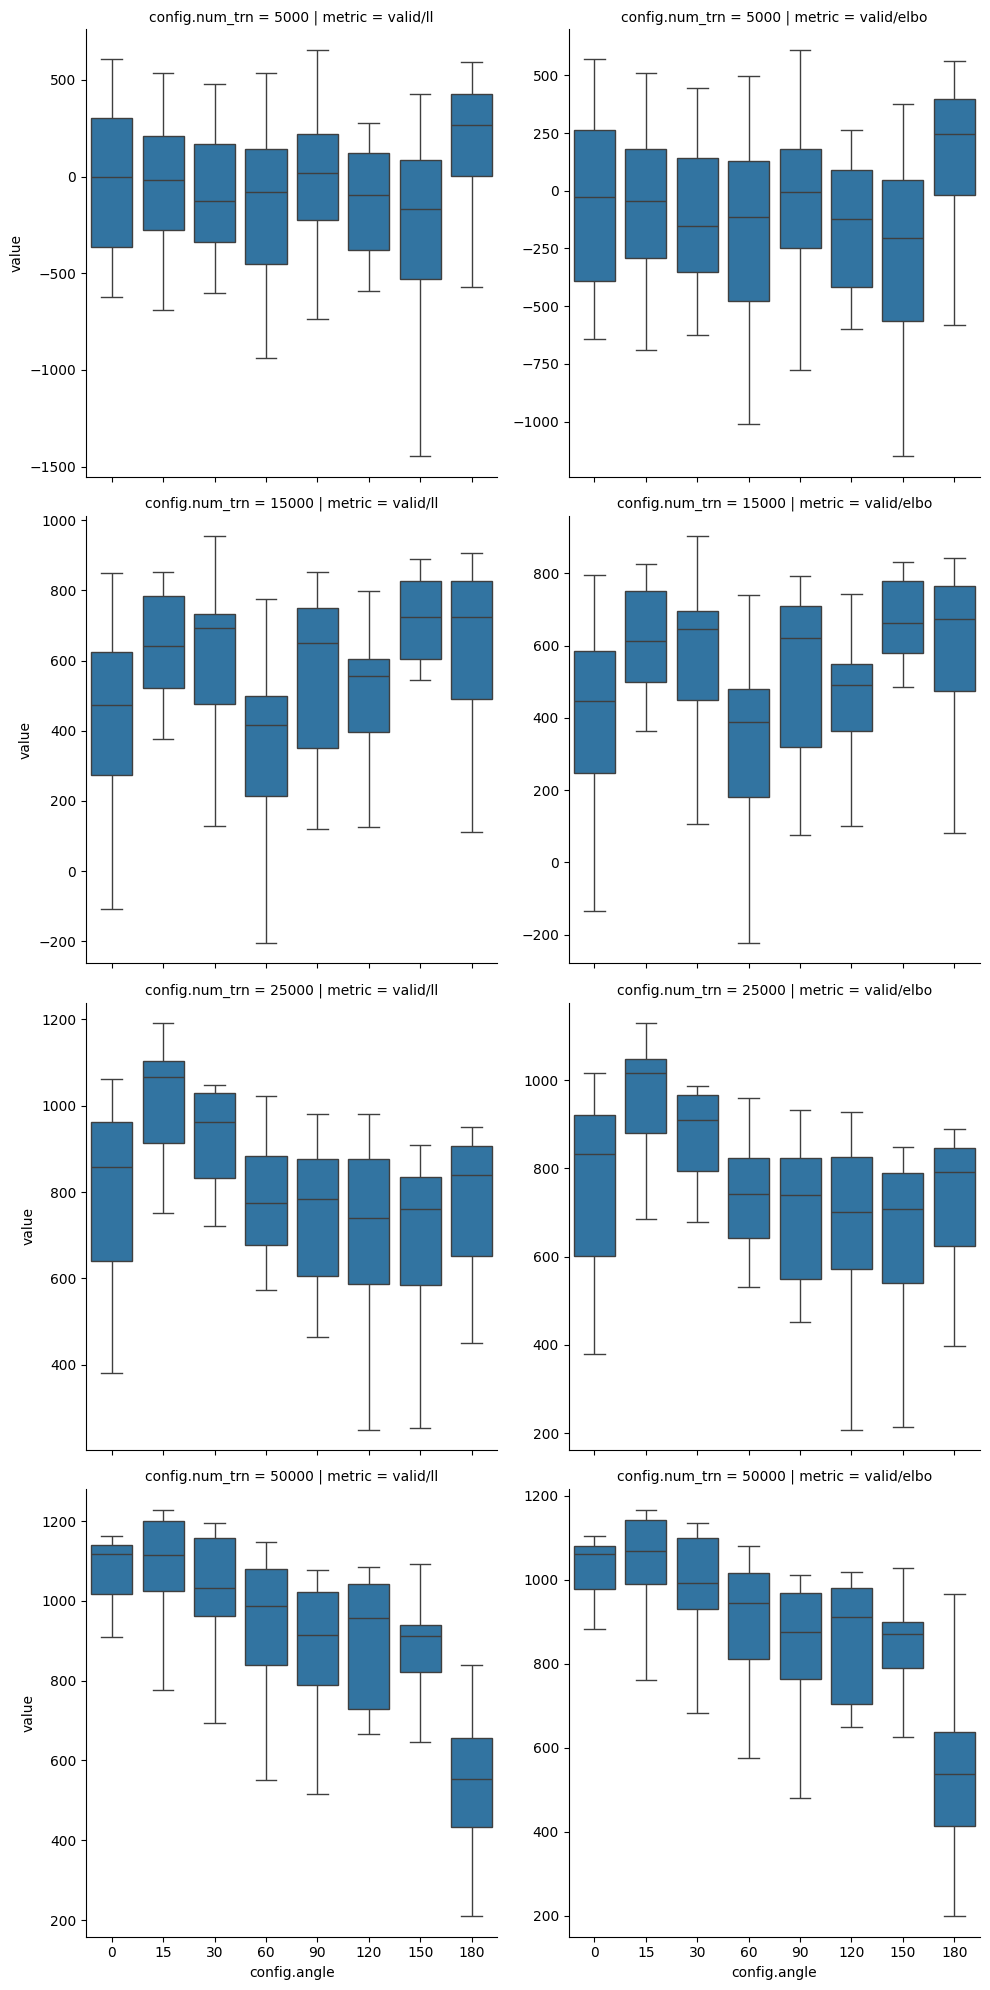

In [12]:
plot_df = df_filtered[[
    'summary.valid/ll', 'summary.valid/elbo', 'config.angle',  'config.num_trn',
]]

# take only some settings
# plot_df = plot_df[
#     plot_df['config.init_lr'].isin([0.0003])
# ]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn'],
    value_vars=['summary.valid/ll', 'summary.valid/elbo'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


# g = sns.relplot(
#     x="config.angle", y="value", hue="metric",
#     markers=True,
#     # palette=sns.color_palette('viridis', as_cmap=True),
#     kind="line",
#     facet_kws=dict(sharey=False, sharex=False),
#     data=plot_df
# )
# # g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
# # g.set_titles('Total steps: {col_name}')
# for axs in g.axes:
#     for ax in axs:
#         # ax.set(xscale="symlog")
#         ax.set_xticks(plot_df['config.angle'].unique())
#         ax.set_xticklabels(plot_df['config.angle'].unique(), rotation=45)
#         # ax.set_xlim(-.1, 385)
# plt.show()

sns.catplot(data=plot_df, x="config.angle", y="value", col="metric", row='config.num_trn', kind="box", showfliers=False, sharey=False)

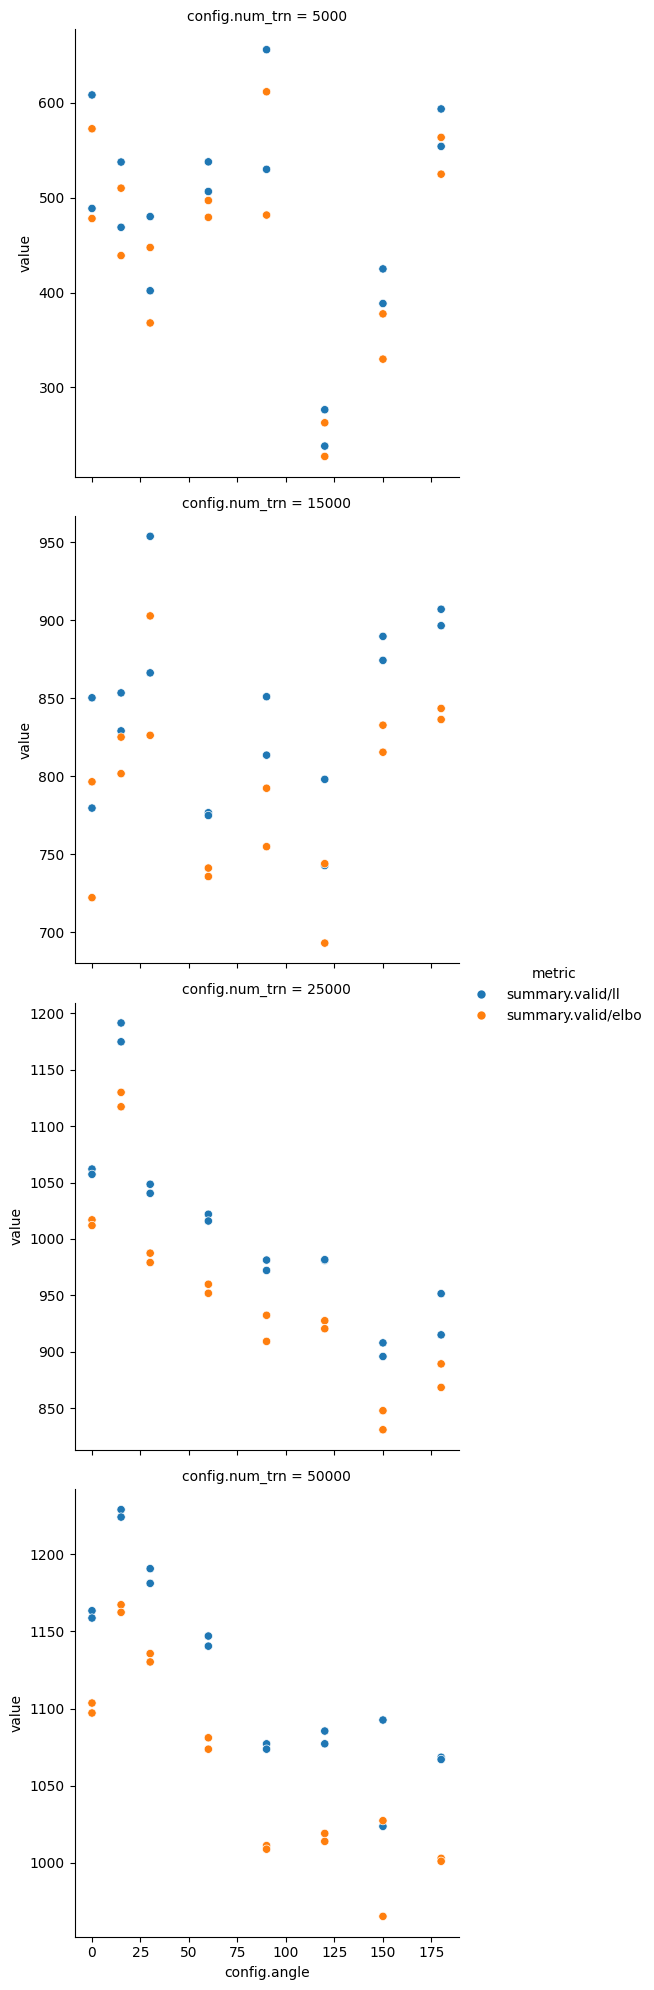

In [13]:
# take only the top 4 runs for each sweep
plot_df = df_filtered.groupby(
    'sweep').apply(
    lambda x: x.nlargest(2, 'summary.valid/elbo')).reset_index(drop=True)[[
    'summary.valid/ll', 'summary.valid/elbo', 'config.angle', 'config.num_trn',
]]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn'],
    value_vars=['summary.valid/ll', 'summary.valid/elbo'],
    var_name='metric',
    value_name='value'
)

sns.relplot(data=plot_df, x="config.angle", y="value", hue="metric", row='config.num_trn', kind='scatter', facet_kws={'sharey': False})